#### Import the dataset and the libraries

In [ ]:
import pandas as pd
import sklearn

df = pd.read_csv('/nba_train.csv')

In [ ]:
info_df = pd.read_csv('/player_stats.csv')
print(info_df)

   Attribute Name                           Description
0              Id                     Player Identifier
1              GP                          Games Played
2             MIN                        Minutes Played
3             PTS                       Points Per Game
4             FGM                      Field Goals Made
5             FGA                  Field Goals Attempts
6             FG%                   Field Goals Percent
7         3P Made                         3-Points Made
8             3PA                     3-Points Attempts
9             3P%                      3-Points Percent
10            FTM                       Free Throw Made
11            FTA                   Free Throw Attempts
12            FT%                    Free Throw Percent
13           OREB                    Offensive Rebounds
14           DREB                    Defensive Rebounds
15            REB                              Rebounds
16            AST                               

In [ ]:
df.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


# 1. Data Pre-processing


*   Data Description
*   Null value analysis


*   Duplicate value analysis
*   Outlier analysis

#### Required Steps:
1.3, 1.6, 1.8


In [ ]:
df.info()

In [ ]:
df.describe().transpose()

**1.1 NULL value analysis**

In [ ]:
print(df.isnull().sum())

**1.2 Duplicate Value Analysis**

In [ ]:
df[df.duplicated()]

**1.3 Outlier Analysis**

In [ ]:
df.boxplot() # columns=[]

Util functions

In [ ]:
def plot_data_to_grid(all_data, num_cols=7, figsize=(15, 15), pad=3.0):
    num_elements = len(all_data)
    num_rows = (num_elements // num_cols) + 1
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.tight_layout(pad=pad)

    for i, (col, data) in enumerate(all_data.items()):
        row = i // num_cols
        col_num = i % num_cols
        axs[row, col_num].boxplot(data)
        axs[row, col_num].set_title(col)

    # Hide empty subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axs.flatten()[j])

    plt.show()

def plot_images_grid(figures, num_cols=3, figsize=(40, 40), pad=3.0):
    num_elements = len(figures)
    num_rows = (num_elements // num_cols) + (num_elements % num_cols > 0)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.tight_layout(pad=pad)

    if num_rows == 1:
        axs = [axs]
    elif num_cols == 1:
        axs = [[ax] for ax in axs]

    axs = np.array(axs).flatten()

    for i, figure in enumerate(figures):
        figure.canvas.draw()
        image = np.frombuffer(figure.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(figure.canvas.get_width_height()[::-1] + (3,))
        axs[i].imshow(image)
        axs[i].axis('off')

    # Hide empty subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.show()
    return fig

Visualise outliers

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

target_column = 'TARGET_5Yrs'
column_names = ~df.columns.isin(['Id', target_column])
columns = df.columns[column_names]

def calculate_boxplot_data(df):
    boxplot_data = {col: df[col].dropna().values for col in columns}
    return boxplot_data


import seaborn as sns
import numpy as np

# https://www.kaggle.com/code/faressayah/outlier-detection-using-pdf-and-z-score
def plot_histogram(data, column, bins=50, figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    data[column].hist(bins=bins, alpha=0.6, ax=ax)
    ax.axvline(np.mean(data[column]), ls='--', c='r', label="Mean")
    ax.axvline(np.median(data[column]), ls=':', c='g', label="Median")
    ax.set_xlabel(column)
    ax.set_ylabel("Counts")
    ax.set_title(f"{column} Distribution")
    ax.legend()
    plt.close(fig)
    return fig

def plot_scatter(data, column, figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(data[column], np.random.normal(1, 0.1, size=data.shape[0]), alpha=0.5)
    ax.set_xlabel(column)
    ax.set_title(f"{column} Scatter Distribution")
    plt.close(fig)
    return fig


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def plot_outliers(data, column, thresholds=range(2, 6), figsize=(12, 10), hide=True):
    fig = plt.figure(figsize=figsize)

    for i, threshold in enumerate(thresholds, 1):
        ax = fig.add_subplot(2, 2, i)
        visual_scatter = np.random.normal(size=data.shape[0])
        good = np.abs(zscore(data[column])) < threshold
        ax.scatter(data[column][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
        ax.scatter(data[column][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
        ax.legend()
        ax.set_title(f"{column} Outliers (threshold={threshold})")

    plt.tight_layout()
    if hide:
      plt.close(fig)
    return fig

boxplot_data = calculate_boxplot_data(df)
plot_data_to_grid(boxplot_data)
hist_figs = []
scat_figs = []
for column in columns:
  #hist_figs.append(plot_histogram(df, column))
  scat_figs.append(plot_outliers(df, column, thresholds=[3]))
chunk_size = 9
num_cols = 3
for i in range(0, len(hist_figs), chunk_size):
    chunk = hist_figs[i:i + chunk_size]
    fig = plot_images_grid(chunk, num_cols=num_cols)
    #fig.savefig(f'hist_{i}.png')
for i in range(0, len(scat_figs), chunk_size):
    chunk = scat_figs[i:i + chunk_size]
    fig = plot_images_grid(chunk, num_cols=num_cols)
    #fig.savefig(f'outliers_{i}.png')

**Outlier Removal**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Function to remove outliers with z-score threshold
def remove_outliers(data, threshold=5):
    z_scores = np.abs(zscore(data))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return data[filtered_entries]

# Identifying columns to process
target_column = 'TARGET_5Yrs'
columns_to_check = df.columns[~df.columns.isin(['Id', target_column])]

# Apply outlier removal on the entire DataFrame except for 'Id' and target_column
df_cleaned = df.copy()
df_cleaned[columns_to_check] = remove_outliers(df[columns_to_check])

# Drop any rows that contain NaN values resulting from the outlier removal
df_cleaned.dropna(inplace=True)

# Example usage: plotting outliers for a specific column
#plot_outliers(df_cleaned, 'FTA', hide=False)
#plot_outliers(df, 'FTA', hide=False)
df = df_cleaned

**1.4 Correlation Analysis**

- Numercial Only
- Calculate correlations
- Heatmap
- Observation: top features

In [ ]:
# Convert categorical into numerical if any

#df['Species'] = df['Species'].astype('category')
#df['Species'] = df['Species'].cat.codes
#df.head()

Include the target column!

In [ ]:
corr = df[df.columns[~df.columns.isin(['Id',])]].corr()
print(corr)

In [ ]:
# prompt: Print the correlations of the target column

print(corr[target_column].sort_values(ascending=False))


TARGET_5Yrs    1.000000
GP             0.242108
FGM            0.183568
MIN            0.182203
PTS            0.182004
FTA            0.176525
REB            0.175627
FTM            0.173913
OREB           0.172604
DREB           0.168065
FGA            0.162389
FG%            0.158858
TOV            0.151240
STL            0.128381
BLK            0.098642
AST            0.096771
FT%            0.039429
3P Made        0.015016
3PA            0.003463
3P%           -0.011977
Name: TARGET_5Yrs, dtype: float64


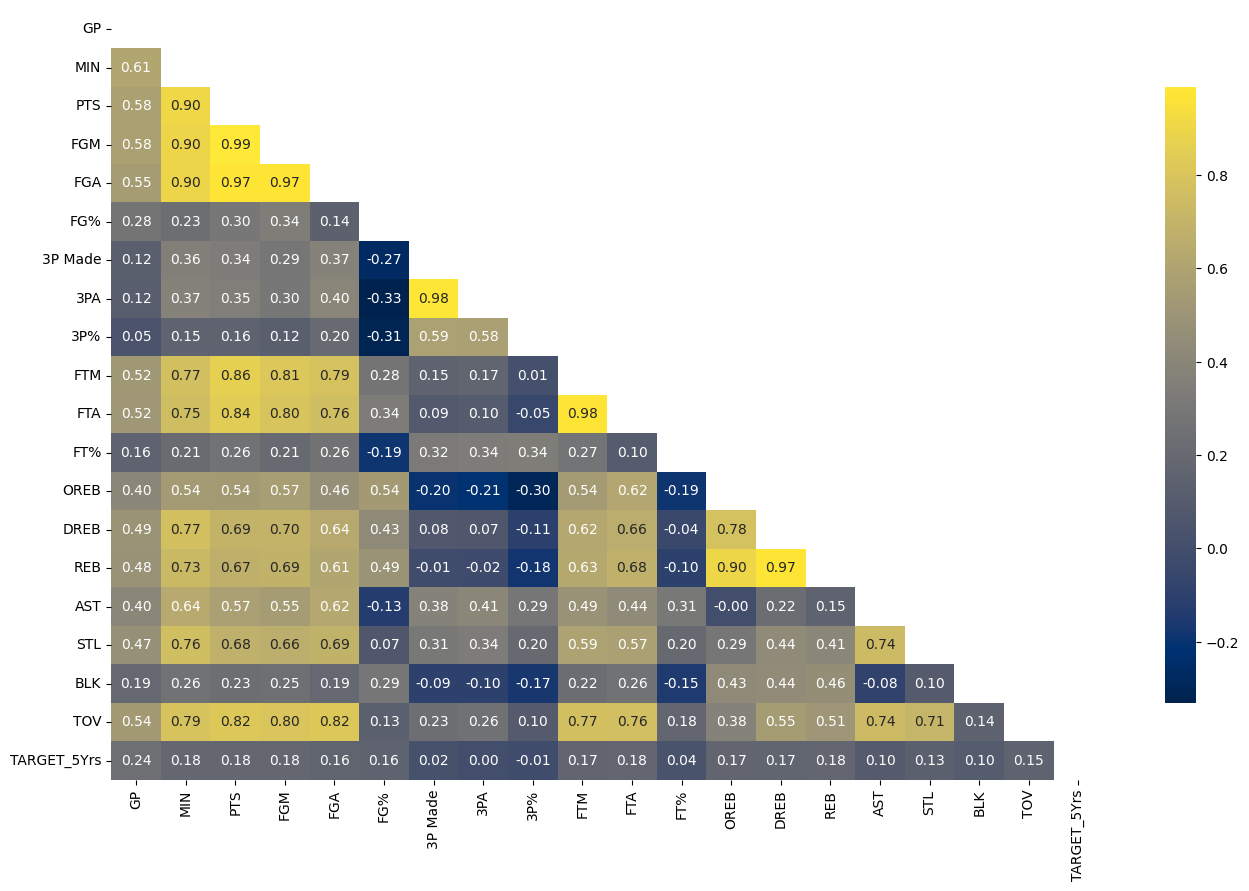

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_heatmap(corr):
  # Mask upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # green, red/yellow light, // darker, yellow,dark,purple, yellow/gray
  # Clearest ones : cividis and magma
  colour_themes = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
  plt.figure(figsize=(16, 10))
  sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=colour_themes[4], cbar_kws={"shrink": .8})
  plt.show()

corr_heatmap(corr)


#### **1.6 Feature Selection**
- x: the most important features.
- y: the target

In [ ]:
all_top_corr_features = [
    "GP","FGM","MIN","PTS","FTA","REB","FTM","OREB","DREB","FGA","FG%","TOV","STL","BLK","AST"
]

X=df[['GP', 'FGM', 'MIN', 'FTA', 'REB', 'AST', 'STL', 'TOV', 'FG%']]
X=df[all_top_corr_features]
y=df[[target_column]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=random_state)

# Simpler strategy (regardless of correlations)
#X = df.iloc[:,1:-1]         # All columns except the first and last one (respectively the ID and Target feature)
#y = df.iloc[:,-1].copy()    # Only the last column

In [ ]:
X
y

X.skew()

#### 1.7 Data normalisation (Optionnal)

In [ ]:
# Perform min-max scaling between (-1,1)
# StandardScaler for MLP (Neural Network)
# Data Binarization (NN, SVM)
# See w4

#### 1.8 Test-train split

In [ ]:
from sklearn.model_selection import train_test_split

random_state=1000 # makes the outputs consistent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=random_state)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (5539, 15)
y_train: (5539, 1)
X_test: (2375, 15)
y_test: (2375, 1)


# 2. Modeling
- Util functions
- 1 Random Forest w9
- 2 SVM w10
- 3 Decision Tree w7
- 4 Neural Network w11
- 5 Knn classifiers w8
- 6 Testing models one by one

#### Util functions
- Accuracy scores
- Confusion matrix/report
- ROC Curve/AUC score

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_classifier(clf, X_train, y_train, X_test, y_test, name):
    """
    Evaluate the classifier and print the accuracy, test score, and train score.

    Args:
        clf: The classifier to evaluate.
        X_train: Training data features.
        y_train: Training data labels.
        X_test: Test data features.
        y_test: Test data labels.
        name: The name of the classifier.
    """
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    return (name, accuracy, train_score, test_score)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

def plot_confusion_matrix(y_true, y_pred):
    # print(
    #     f"\ntrue negatives (class 0 correctly predicted)"
    #     f"\nfalse positives (class 1 incorrectly predicted as class 0)"
    #     f"\nfalse negatives (class 0 incorrectly predicted as class 1)"
    #     f"\ntrue positives (class 1 correctly predicted)"
    # )
    mat = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(mat)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image


from sklearn.metrics import classification_report

def get_confusion_m_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    return report_df

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_probs):
    # Compute AUC for the positive class (1)
    auc1 = roc_auc_score(y_test, y_probs[:, 1])

    # Plot the ROC curve for the positive class (1)
    fig, ax = plt.subplots()
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
    ax.plot(fpr, tpr, color='blue', lw=2, label='Class 1 ROC curve (area = {:.3f})'.format(auc1))

    # Plot the random chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image, auc1

In [ ]:
def plot_images_grid(images, num_cols=3, title=''):
    num_rows = (len(images) // num_cols) + 1
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    fig.suptitle(title, fontsize=16)
    fig.tight_layout(pad=3.0)
    for i, (name, image) in enumerate(images):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].imshow(image)
        axs[row, col].set_title(name)
        axs[row, col].axis('off')
    # Hide empty subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axs.flatten()[j])
    plt.show()
    return fig

In [ ]:
import shutil
from google.colab import files

def download_folder_as_zip(folder_path, zip_name):
    """
    Zips the specified folder and downloads it as a zip file.

    Args:
        folder_path: Path to the folder to be zipped and downloaded.
        zip_name: The name of the resulting zip file (without .zip extension).
    """
    shutil.make_archive(zip_name, 'zip', folder_path)
    files.download(f'{zip_name}.zip')

In [ ]:
import os

def delete_all_files_in_folder(folder_path):
    """
    Deletes all files inside the specified folder.

    Args:
        folder_path: Path to the folder where files will be deleted.
    """
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')

In [ ]:
# if clf:
#   evaluate_classifier(clf, X_train, y_train, X_test, y_test)

In [ ]:
# if clf:
#   y_probs = clf.predict_proba(X_test)
#   plot_confusion_matrix(y_test, y_probs)
#   get_confusion_m_report(y_test, y_probs)

In [ ]:
#if clf:
#  y_probs = clf.predict_proba(X_test)
#  plot_roc_curve(y_test, y_probs)

### 2.1 Random Forest (w9)
[See docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
[RD](https://scikit-learn.org/stable/modules/ensemble.html#parameters)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def create_rf_classifier(X_train, y_train):
    params = {
        "n_estimators": 100,
        "max_features": "sqrt",
        "oob_score": True,
        "random_state": random_state,
    }
    clf = RandomForestClassifier(**params)
    clf.fit(X_train, y_train)
    return clf

### 2.2 SVM (w10)
[See docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html)
[SVM](https://scikit-learn.org/stable/modules/svm.html)

In [ ]:
from sklearn.svm import NuSVC

def create_svm_classifier(X_train, y_train):
    params = {
        "nu": 0.3,
        "random_state": random_state,
        "probability": True,
    }
    clf = NuSVC(**params)
    clf.fit(X_train, y_train)
      # The number of support vectors in each class
      print("Numbers of support vectors for each class:", clf.n_support_)
      # The indices of the support vectors
      print("Support vector indexes in the training set:", clf.support_)
      # The support vectors
      print("Support vectors in the training set:", clf.support_vectors_.shape)
    return clf

### 2.3 Decision Tree (w7)
[See docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[DT](https://scikit-learn.org/stable/modules/ensemble.html#parameters)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def create_dt_classifier(X_train, y_train):
    clf = DecisionTreeClassifier(max_depth=5) #max_leaf_nodes=3
    clf.fit(X_train, y_train)
    clf.feature_importances_
    plot_tree(clf)
    return clf

### 2.4 Neural Network (w11)
[See docs](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

[NNs](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#)

In [ ]:
from sklearn.neural_network import MLPClassifier

def create_nn_classifier(X_train, y_train):
  params = {
      "hidden_layer_sizes": (2,2), # (100, 4)  (10,5)  (4)
      "early_stopping": True,
      "verbose": True,
      "random_state": random_state,
      "validation_fraction": 0.2,
  }

  clf = MLPClassifier(**params)
  clf.fit(X_train, y_train)
  return clf

### 2.5 Knn classifiers (w8)
[See docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def create_knn_classifier(X_train, y_train):
    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train, y_train)
    # potential classes
    clf.classes_
    return clf

### Run all classifiers

In [ ]:
classifier_names = ["rf", "svm", "dt", "nn", "knn"]
idx = None
classifier_names = classifier_names[idx-1:idx] if idx else classifier_names

for name in classifier_names:
    clf_name = name + "_clf"
    print(clf_name)
    globals()[clf_name] = globals()["create_" + name + "_classifier"](X_train, y_train)

rf_clf


<ipython-input-20-40257b5f5efd>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


svm_clf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


dt_clf
nn_clf
Iteration 1, loss = 0.63436704
Validation score: 0.688628
Iteration 2, loss = 0.59983458
Validation score: 0.752708
Iteration 3, loss = 0.57462622
Validation score: 0.788809
Iteration 4, loss = 0.55494768
Validation score: 0.805957
Iteration 5, loss = 0.53941572
Validation score: 0.808664
Iteration 6, loss = 0.52769844
Validation score: 0.812274
Iteration 7, loss = 0.51701127
Validation score: 0.818592
Iteration 8, loss = 0.50736136
Validation score: 0.822202
Iteration 9, loss = 0.49858565
Validation score: 0.825812
Iteration 10, loss = 0.49075885
Validation score: 0.825812
Iteration 11, loss = 0.48370149
Validation score: 0.836643


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 12, loss = 0.47742752
Validation score: 0.836643
Iteration 13, loss = 0.47230638
Validation score: 0.836643
Iteration 14, loss = 0.46772273
Validation score: 0.836643
Iteration 15, loss = 0.46381349
Validation score: 0.836643
Iteration 16, loss = 0.46014545
Validation score: 0.836643
Iteration 17, loss = 0.45718232
Validation score: 0.836643
Iteration 18, loss = 0.45450907
Validation score: 0.836643
Iteration 19, loss = 0.45230881
Validation score: 0.836643
Iteration 20, loss = 0.45026048
Validation score: 0.836643
Iteration 21, loss = 0.44826248
Validation score: 0.836643
Iteration 22, loss = 0.44676700
Validation score: 0.836643
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
knn_clf


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrices:


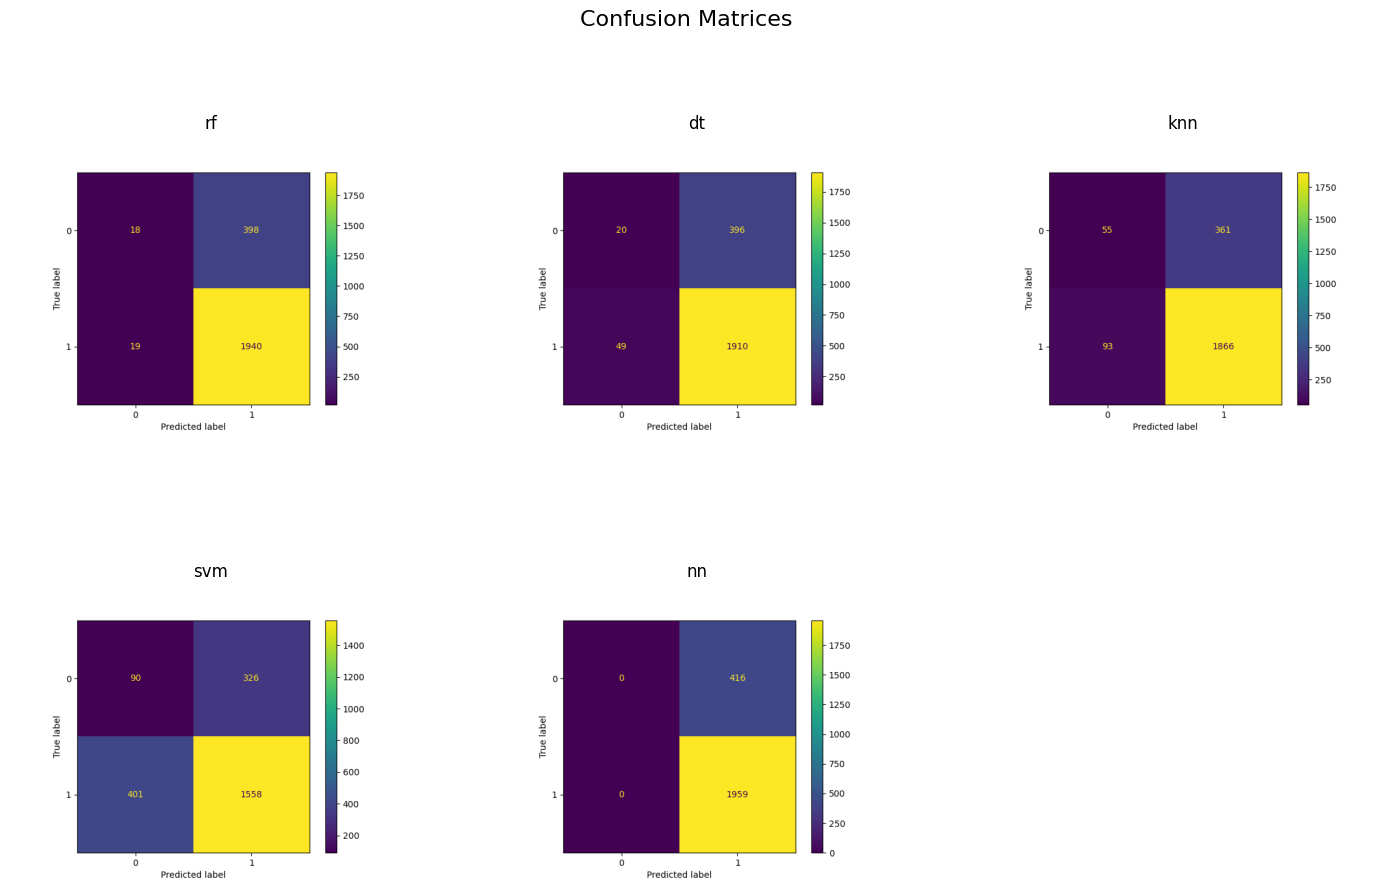

ROC Curves:


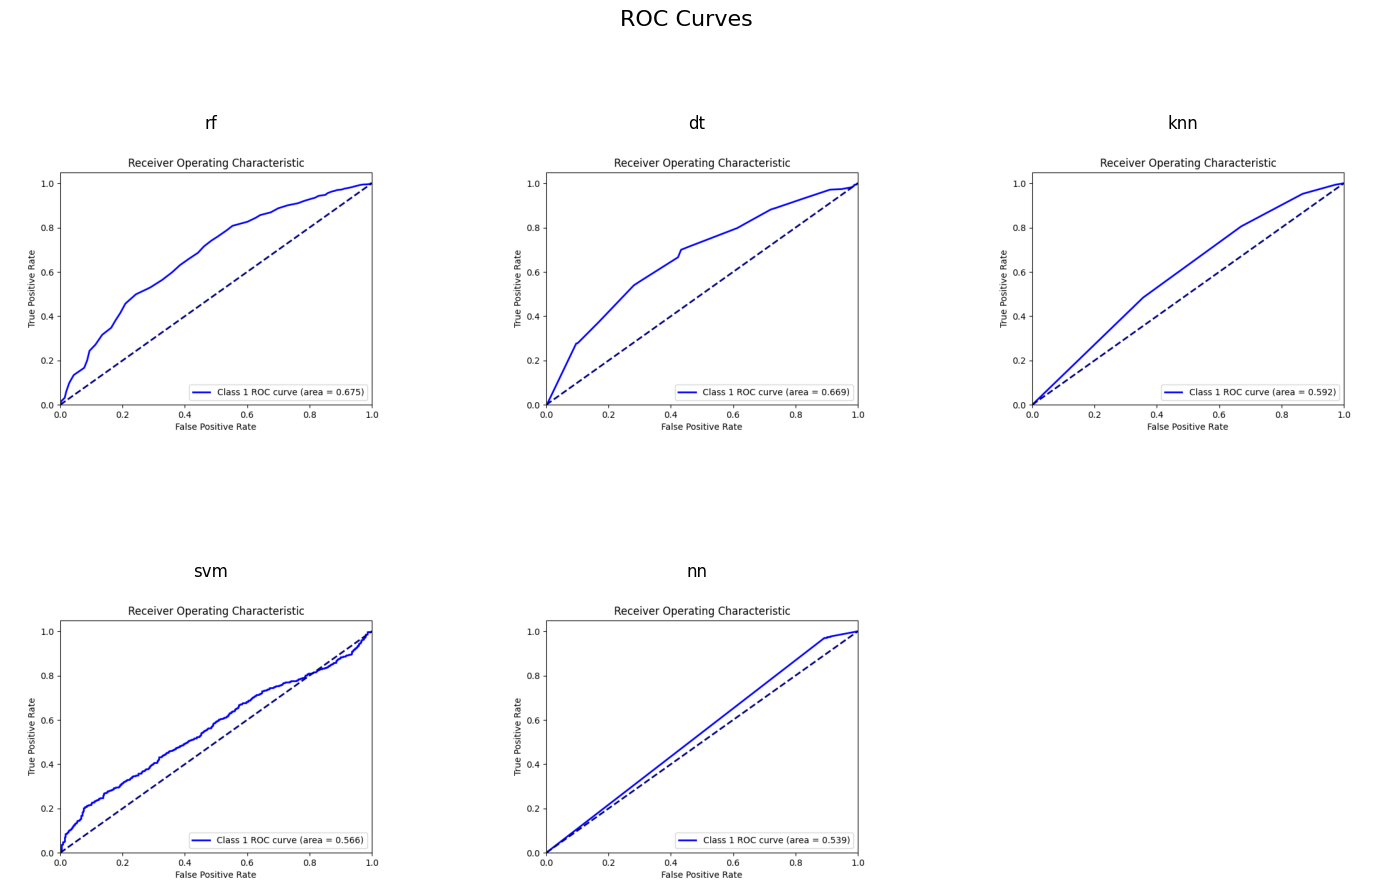

,Classifier,Accuracy,Train Score,Test Score,AUC
0,rf,0.824421,1.000000,0.824421,0.675349
2,dt,0.812632,0.845459,0.812632,0.668896
4,knn,0.808842,0.850876,0.808842,0.591670
1,svm,0.693895,0.710959,0.693895,0.566495
3,nn,0.824842,0.836613,0.824842,0.538608


In [ ]:
results = []
confusion_reports = {}
confusion_matrix_images = []
roc_curve_images = []

# Evaluate each classifier and store the results
for name in classifier_names:
    clf_name = name + "_clf"
    clf = globals()[clf_name]
    eval = evaluate_classifier(clf, X_train, y_train, X_test, y_test, name)

    # Confusion matrix and report
    y_pred = clf.predict(X_test)
    confusion_report = get_confusion_m_report(y_test, y_pred)
    confusion_reports[name] = confusion_report
    confusion_matrix_images.append((name, plot_confusion_matrix(y_test, y_pred)))

    # ROC/AUC
    y_probs = clf.predict_proba(X_test)
    roc_image, auc = plot_roc_curve(y_test, y_probs)
    roc_curve_images.append((name, roc_image))
    results.append(eval + (auc,))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Train Score', 'Test Score', 'AUC'])
results_df = results_df.sort_values(by='AUC', ascending=False)

# Create a mapping of classifier names to their AUC scores
auc_mapping = {row['Classifier']: row['AUC'] for index, row in results_df.iterrows()}

# Sort images based on AUC
sorted_confusion_matrix_images = sorted(confusion_matrix_images, key=lambda x: auc_mapping[x[0]], reverse=True)
sorted_roc_curve_images = sorted(roc_curve_images, key=lambda x: auc_mapping[x[0]], reverse=True)

# Save results to CSV
results_df.to_csv('/content/output/classifier_results.csv', index=False)

# Merge confusion reports into one DataFrame and save to CSV
merged_confusion_reports = pd.concat(confusion_reports, names=['Classifier'])
merged_confusion_reports.to_csv('/content/output/merged_confusion_reports.csv')

# Plot sorted confusion matrices
print("Confusion Matrices:")
conf_grid = plot_images_grid(sorted_confusion_matrix_images, title='Confusion Matrices')
conf_grid.savefig('/content/output/confusion_matrices.png')

# Plot sorted ROC curves
print("ROC Curves:")
roc_grid = plot_images_grid(sorted_roc_curve_images, title='ROC Curves')
roc_grid.savefig('/content/output/roc_curves.png')

results_df


In [ ]:
folder_path = '/content/output'
zip_name = 'clf_models'
download_folder_as_zip(folder_path, zip_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
folder_path = '/content/output'
delete_all_files_in_folder(folder_path)

# 3. Hyperparameters finetuning

#### Grid Search for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum number of levels in each decision tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required at each leaf node
}

# Setup the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.8332142857142857


In [ ]:
best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.83625
